# Week 1
## Task 1 :  Bitcoin Price Prediction

In [1]:
# Import required libraries
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

# Data collection

In [2]:
# Download the csv file from Github
url= "https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv"
download = requests.get(url).content

In [3]:
# Read the downloaded content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [4]:
# Print first 5 rows of the dataframe
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [5]:
# What's the 1024th value in the column 'btc_market_price'?
df.loc[1023, 'btc_market_price']

13.6888

The 1024th value in the column 'btc_market_price' is 13.6888

# Exploratory data analysis

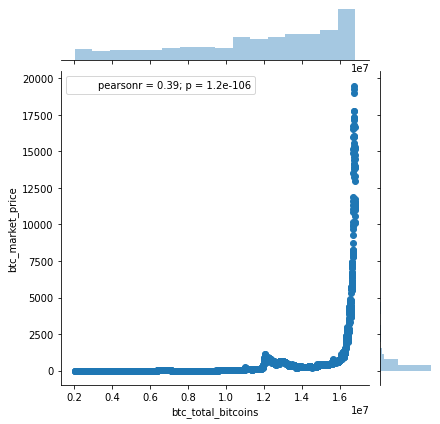

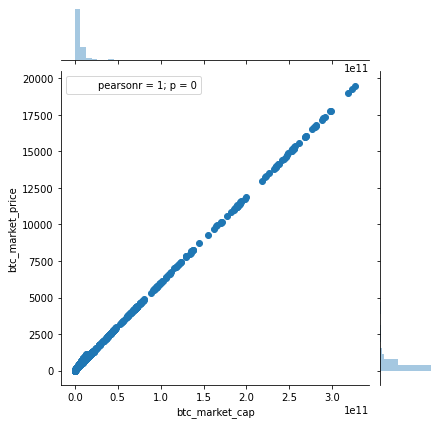

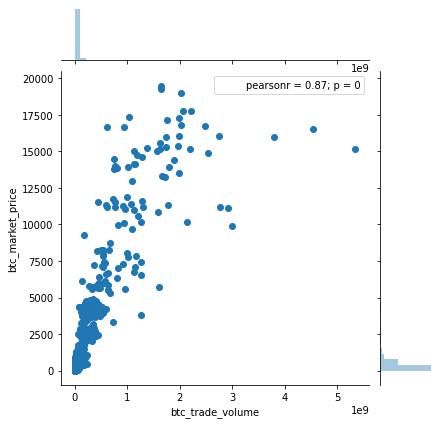

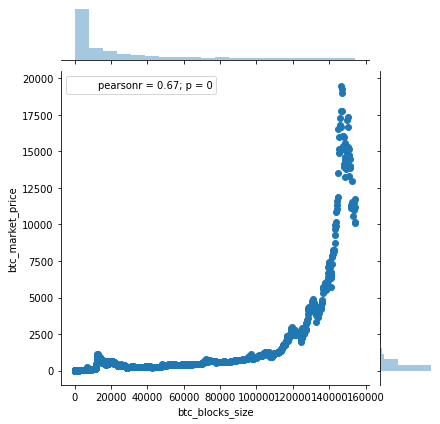

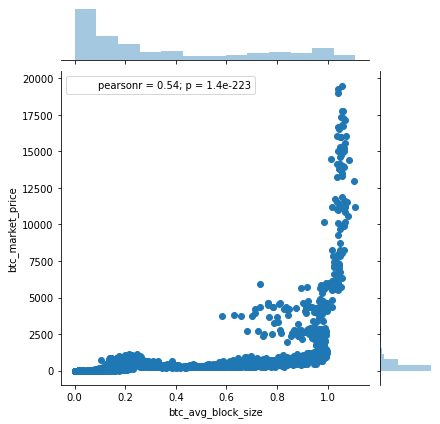

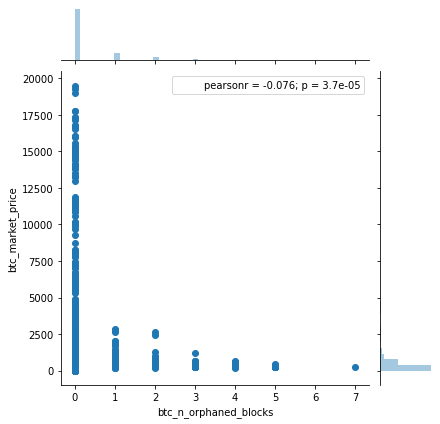

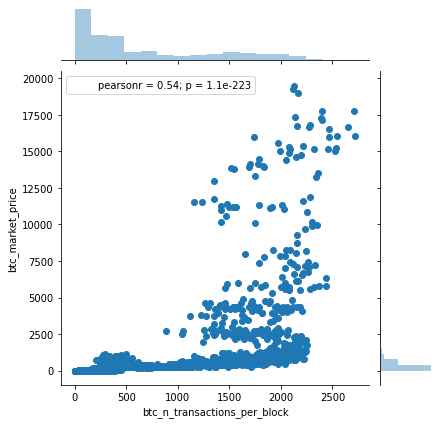

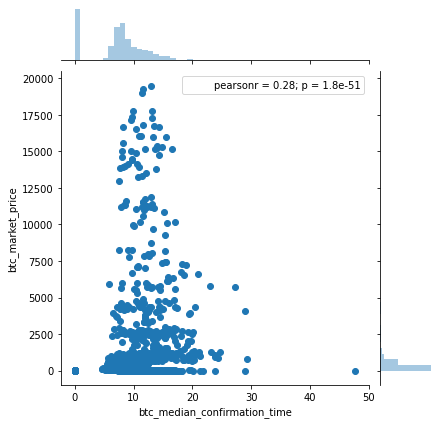

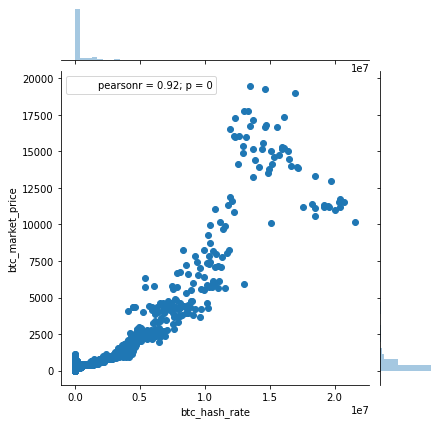

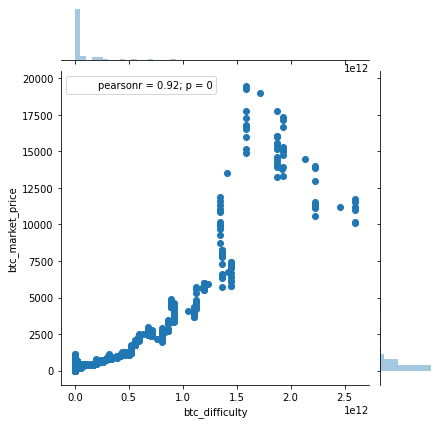

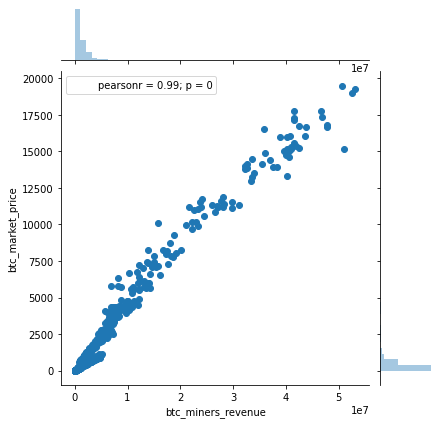

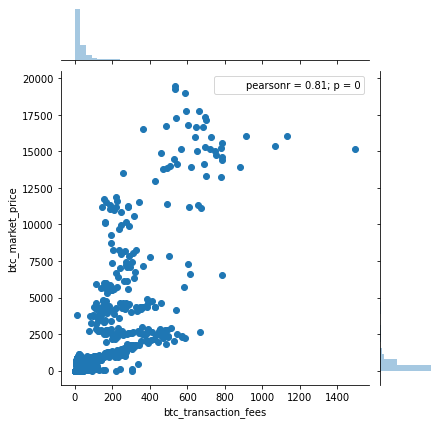

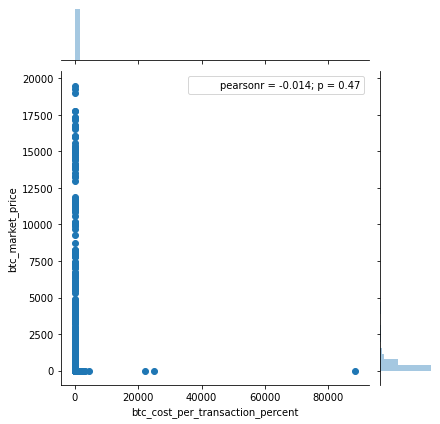

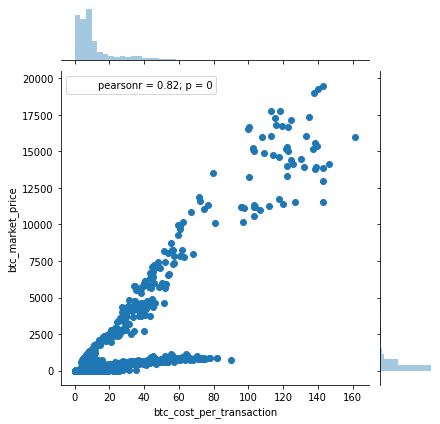

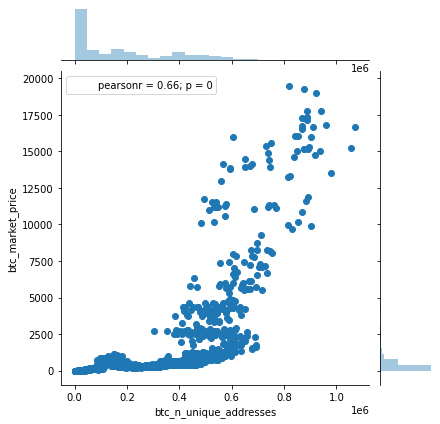

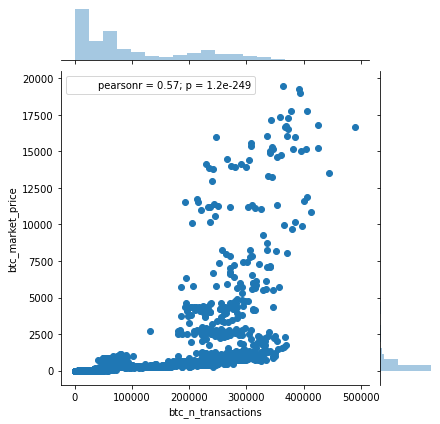

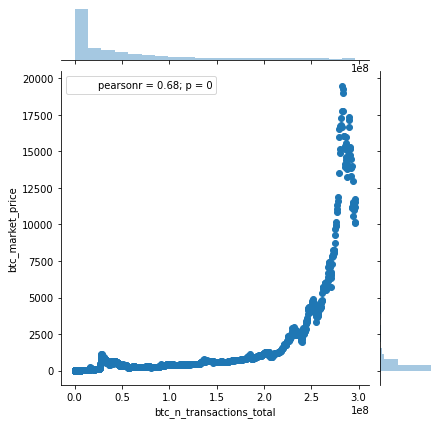

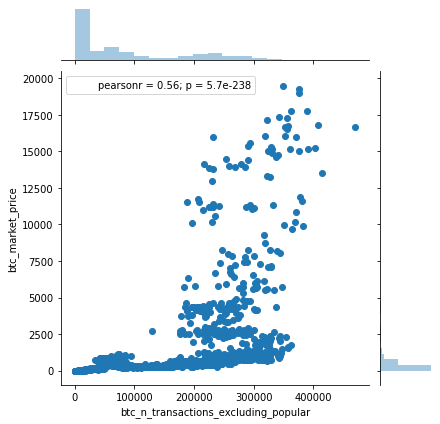

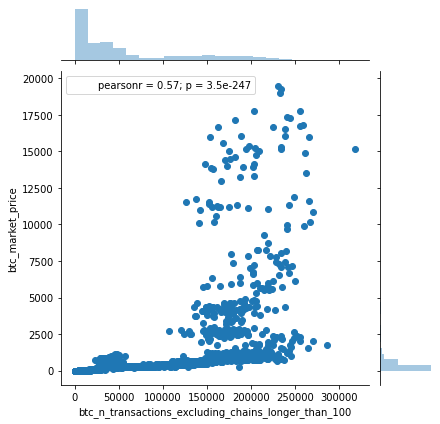

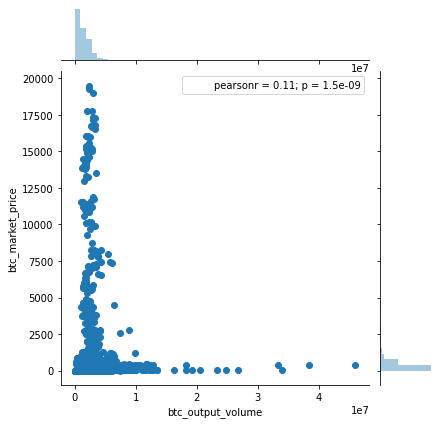

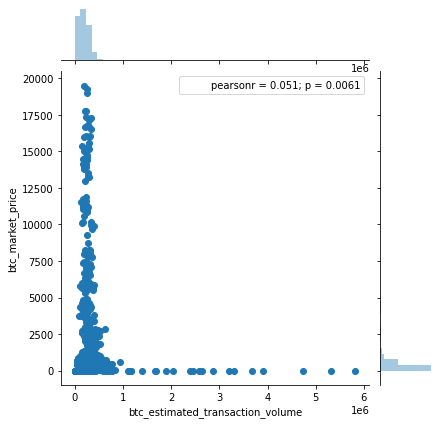

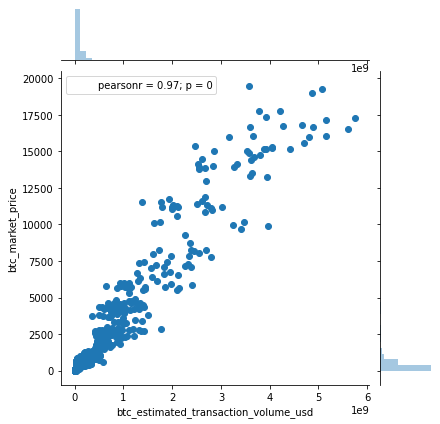

In [6]:
# Jointplot using seaborn
columns = ['btc_total_bitcoins', 'btc_market_cap','btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd']

for col in columns:
    sns.jointplot(data=df,x=col,y=df['btc_market_price'],stat_func=stats.pearsonr)
    plt.show()

# Data cleaning

In [7]:
# Fill 'NaN' using mean
df.fillna(df.mean(), inplace=True)

In [8]:
# Decide features and target variable
features =df[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]

target = df['btc_market_price']

In [9]:
X= features

y= target

# Model Formulation and Predictions

In [10]:
# Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
print(X_train.shape)
print(y_train.shape)

(2324, 7)
(2324,)


In [12]:
# Perform Linear regression
from sklearn.linear_model import LinearRegression
# Create a model and fit it
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation

In [14]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: ",round(mse))

Mean squared error:  439.0
